<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/05.%EC%B6%9C%EB%A0%A5%EC%B8%B5%20%EC%84%A4%EA%B3%84%ED%95%98%EA%B8%B0(%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **신경망의 사용처**

- 신경망은 분류, 회귀 모두 사용 가능하다
    - 출력층의 **활성화 함수**에 따라서 목적(사용처)가 달라진다 -> 분류 or 회귀
    - 항등 함수 사용 --> **회귀**

- 소프트맥스 or 시그모이드 함수 사용 --> **분류**
    - 시그모이드는 결과값을 **확률**로 표현하고 싶을 때 사용한다 (잘 안 씀)
        - ex) 89.12% 확률로 부정적인 리뷰입니다 ...
    
    - ---> 소프트맥스 함수를 주로 분류용 활성화 함수로 사용한다

# 소프트맥스 함수 구현하기
$$
y_k = \frac{e^{z_k}}{\sum_{i=0}^{n-1} e^{z_i}}
$$

* $k$ : $k$번째 출력 ( 클래스 번호 ) 0, 1, 2 ....
* $z$ : 출력층에 있는 뉴런의 $WX+b$ 연산
* $n$ : 전체 클래스의 개수

In [ ]:
import numpy as np

z = np.array([0.3, 2.9, 4.0])

# 분자 부분 계산
exp_z = np.exp(z) # 결과물 : e의 0.3승, 2.9승, 4.0승

# 분모 부분 계산
sum_exp_z = np.sum(exp_z)

# 소프트맥스를 적용한 최종 예측값
y = exp_z / sum_exp_z

print("softmax의 결과 : {}".format(y))

softmax의 결과 : [0.01821127 0.24519181 0.73659691]


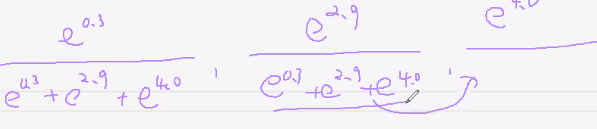

In [ ]:
print("softmax의 총 합은 항상 : {}".format(np.sum(y)))

softmax의 총 합은 항상 : 1.0


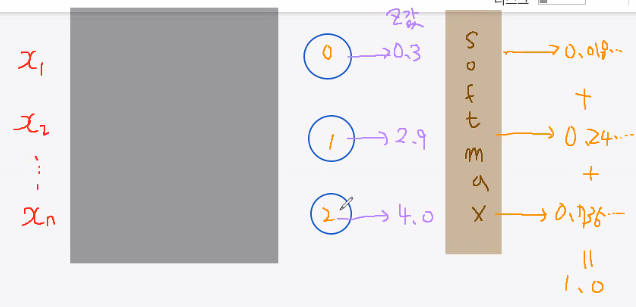

## softmax의 특징

1. 어떠한 실수 배열이 softmax를 지나게 되면 그 배열의 총합은 언제나 1.0이 된다  
    --> softmax 함수의 결과물의 총 합은 **항상 1.0**이다

2. 전체의 합이 1이므로 **각각의 값**은 0번 클래스로 분류될 확률, 1번 클래스로 분류될 확률, ..., n번 클래스로 분류될 **확률**을 나타낸다

### 단조함수

소프트맥스 함수는 **단조함수**이다

```
z = [3.1, 18.3, 10.3]
z[0] < z[2] < z[1]

y = softmax(z)
y[0] < y[2] < y[1]
```

소프트맥스 함수를 지나도 부등호의 순서가 그대로 유지되는 것  
( 입력값과 출력값의 부등호 순서 유지 )  

---> **단조함수의 특징**  

따라서 예측만 위해서라면 굳이 소프트맥스를 쓰지 않아도 된다  
---> 소프트맥스는 **학습**에서 사용된다

In [ ]:
# 소프트맥스 함수 구현하기

def softmax(z):
    exp_z = np.exp(z) # 분자
    sum_exp_z = np.sum(exp_z) # 분모
    y = exp_z / sum_exp_z

    return y 

In [ ]:
softmax(z)

array([0.01821127, 0.24519181, 0.73659691])

## 소프트맥스 함수 튜닝

- 소프트맥스 함수는 자연상수 $e$의 지수 함수 ( 값의 몇 승 ) 이다
- 따라서 입력값이 조금만 커져도 연산 결과가 굉장히 큰 값이 된다

- ex)
    * $e^{10}$만 되어도 20000이 넘는 수
    * $e^{100}$은 0이 40개가 넘는 큰 숫자
    * $e^{1000}$은 무한대를 의미하는 `inf`

- z값이 100만 넘어도 소프트맥스 함수의 결과는 엄청나게 큰 값이 됨

In [ ]:
big_z = [1000, 900, 1100]
softmax(big_z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

z의 값이 큰 경우 위와 같이 결과값이 nan 값이 됨  
--> 따라서 함수의 **튜닝**이 필요  
------> 수학적인 기교로 튜닝이 가능하다

$$
y_k = \frac{exp(z_k)}{\sum_{i=1}^n exp(z_i)} = \frac{C\,exp(z_k)}{C\,\sum_{i=1}^n exp(z_i)} = \frac{exp(z_k+logC)}{\sum_{i=1}^n exp(z_i+logC)} = \frac{exp(z_k+C^\prime)}{\sum_{i=1}^n exp(z_i+C^\prime)} 
$$

$logC$를 더하는 것을 지수함수로 표현하면 그냥 $-C$가 됨  
$logC = -C$

---> $exp(z_k+logC) = e(z_k-C)$

In [ ]:
c = np.max(big_z)
print(big_z - c)

[-100 -200    0]


In [ ]:
# 튜닝된 소프트 맥스
def softmax(z):
    c = np.max(z) # 상수로 결정되는 C는 원소들 중 최대값을 기준으로 한다

    exp_z = np.exp(z-c)
    sum_exp_z = np.sum(exp_z)

    y = exp_z / sum_exp_z
    return y

In [ ]:
softmax(big_z)

array([3.72007598e-44, 1.38389653e-87, 1.00000000e+00])

# 출력층의 뉴런 수 정하기

- 출력층의 뉴런 개수는 **분류하고 싶은 클래스의 개수대로 설정하면 됨**
- ex) 
    - 모델 1 : `강아지, 고양이, 말`을 분류하는 모델을 만들고 싶다 -> 3
    - 모델 2 : `강아지, 고양이`를 분류하는 모델을 만들고 싶다 -> 2 or 1

        * 2개를 놓을 때는 softmax ( 2개에 대한 각각의 확률 확인 )
        - 1개를 놓을 때는 sigmoid ( 0 혹은 1이 될 확률 확인 -이진분류- )
    
    - 모델 3 : 손글씨 숫자 데이터 `0~9` 까지를 분류하는 모델을 만들고 싶다 -> 10

# MNIST 손글씨 데이터셋 분류 추론 모델 만들기

## 텐서플로우에서 MNIST 데이터 불러오고 형상(shape) 다루기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# mnist 데이터셋 로딩
from tensorflow.keras import datasets
mnist = datasets.mnist

In [ ]:
'''
tuple 형태로 언패킹하기 (훈련용), (테스트용) 
-> 사이킷런의 train_test_split이 아님!
'''
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


★★★★**반드시 데이터의 형상부터 확인해야 한다**★★★★

In [ ]:
X_train.shape

(60000, 28, 28)

NHWC -> (개수, H, W)  
-> 그레이 스케일의 이미지이기 때문에 C(채널)이 없음 확인

In [ ]:
y_train.shape

(60000,)

(개수, )

60000장 중 첫 번째 이미지 데이터만 가져오기

In [ ]:
image = X_train[0]
image.shape

(28, 28)

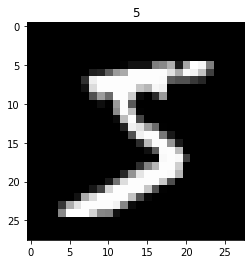

In [ ]:
# matplotlib의 imshow() 함수를 이용해서 이미지 시각화
plt.imshow(image, 'gray')-
plt.title(y_train[0])

plt.show()

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**데이터를 신경망에 넣을 준비**  
-> 훈련, 테스트 모두 동일한 데이터의 feature의 개수를 가져야 한다.

* 신경망은 평평하게 펴진 1차원 배열을 입력으로 받고 있다.
* 즉 지금 우리가 사용할 신경망에 집어 넣을 데이터는 1차원 배열 형태로 들어가야 한다.
    - ---> **배열의 평탄화 작업** ( flatten() 함수 사용 ) 이 필요함
* 평평하게 펴진 데이터를 기반으로 예측을 수행하는 레이어
  * 신경망 - Dense Layer
  * 기하학 - Affine Layer
  * 통합적 - F.C Layer ( Fully Connected Layer ) - 전결합 ( 완전 연결 계층 ) or FCN

---> 나중에는 2차원 배열을 넣을 것임  
(28, 28) -> (1, 784) -> (100, 784)

------
신경망에 이미지 데이터를 입력할 수 있는 경우 확인하기
* 장수에 대한 정보 없이 가로 세로 픽셀에 대한 정보만 있는 상황 : `(28, 28)` -> X
* 장수에 대한 정보 없이 평탄화 시킨 상황 : `(784, )` -> O(일단은 허용. Tensorflow나 Pytorch 같은 머신러닝 라이브러리에서는 허용 X)
-----
`60000`장의 이미지 데이터가 `(28, 28)`인 경우. 즉 `(60000, 28, 28)`
* 장수 데이터가 있는 상태에서 가로 세로 픽셀에 대한 정보만 있는 상황 : `(60000, 28, 28)` -> X
* 장수 데이터가 있는 상태에서 평탄화 시킨 상황 : `(60000, 784)` -> O
------
입력되는 데이터의 차원이 `(N, M)`이면 신경망 F.C 레이어에 집어 넣을 수 있다.
* `N` : BATCH_SIZE( 데이터의 개수 )
* `M` : 데이터 스칼라의 개수
  * 배치를 이야기 하지 않는 경우 : `(M, )` - Vector
  * 배치를 이야기 하면 : `(N, M)` - Matrix

---
**참고로 CNN은 Fully Connected Layer가 아니고, 2차원 배치 데이터를 사용하지 않기 때문에 (N, H, W, C) - 4차원 형태로 들어가야 한다**

In [ ]:
# 신경망에 들어가는 형태로 배열 편집

# 1. flatten을 활용한 평탄화
image = X_train[0].flatten()
image.shape

(784,)

*위의 형태는 Tensorflow 등에서는 허용하지 않는다*

In [ ]:
'''
2. ravel을 활용한 평탄화 ( 잘 사용되어지는 방법은 아님 ) 
이유 : 원본 이미지 데이터가 훼손될 우려가 있음
'''
image = np.ravel(X_train[0])
image.shape

(784,)

In [ ]:
# 3. reshape을 활용한 평탄화 : 원하는 형식대로 자유롭게 바꿀 수 있어서 제일 많이 사용됨
image = X_train[0].reshape(-1)
image.shape

(784,)

In [ ]:
# 텐서플로우나 파이토치 같은 프레임워크에 집어 넣으려면?
X_train[0].reshape(1, -1).shape

(1, 784)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.reshape(60000, -1).shape

(60000, 784)

# MNIST 손글씨 데이터셋을 위한 신경망 만들기 - Fully Connected Layer

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 테스트 데이터만 가져오기
def get_test_data():
    _, (X_test, t_test) = mnist.load_data() # y는 예측값이기 때문에 t(target)으로 변수명 통일
    
    # (N, M) 형태로 리턴하기
    IMAGE_COUNT = X_test.shape[0] # shape[0] : 이미지개수 (X_test.shape -> (10000,28,28))
  
    X_test_reshaped = X_test.reshape(IMAGE_COUNT, -1)

    return X_test_reshaped, t_test

# 이미 학습이 완료된 신경망 데이터 가져오기(sample_weight.pkl)
def init_network():
    import pickle
    with open('/content/drive/MyDrive/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    # 출력층의 활성화 함수 : softmax 사용

    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    # 1층
    Z1 = (x @ W1) + b1
    A1 = sigmoid(Z1)

    # 2층
    Z2 = (A1 @ W2) + b2
    A2 = sigmoid(Z2)

    # 출력층
    Z3 = (A2 @ W3) + b3
    y = softmax(Z3)

    return y

`sample_weight.pkl`에는 3층 신경망의 매개변수가 들어 있음

- W1, W2, b1, b2 : 은닉층
- W3, b3 : 출력층

In [ ]:
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]
b1, b2, b3 = network["b1"], network["b2"], network["b3"]

W1.shape, W2.shape, W3.shape

((784, 50), (50, 100), (100, 10))

- 1층 : 784개의 입력을 받는 50개의 뉴런
- 2층 : 50개의 입력을 받는 100개의 뉴런 
- 3층 : 100개의 입력을 받는 10개의 뉴런

완성된 predict 함수를 사용해 이미지 한 장만 예측하기

In [ ]:
# 테스트 데이터 가지고 오기
X, t = get_test_data()

# 한장만 가져와서 테스트
test_image, test_target = X[0], t[0]

test_image.shape

(784,)

In [ ]:
# 네트워크 불러오기
net = init_network()

test_result = predict(net, test_image)

# test_result 에는 softmax의 결과물 들어있음
#   test_result에 대한 10개 숫자 각각의 확률
#       [0번 클래스 확률, ... , 9번 클래스 확률]

print("예측된 softmax 결과 : \n{}".format(test_result))
print("예측된 label 확인 : {}".format(np.argmax(test_result))) 
# argmax : 배열에서 가장 값이 큰 곳의 인덱스를 리턴
#   즉, 가장 확률이 큰 인덱스를 리턴
print("정답 : {}".format(test_target))

예측된 softmax 결과 : 
[4.2879005e-06 4.5729317e-07 1.8486280e-04 8.3605024e-05 1.5084674e-07
 6.3182205e-07 4.5782045e-10 9.9919468e-01 3.8066935e-07 5.3083024e-04]
예측된 label 확인 : 7
정답 : 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


예측된 label = 정답  
-> 신경망이 잘 예측을 했다는 것 확인

test_image 가 7이 맞는지 이미지로 확인  
-> 이미지로 표시하기 위해서 test_image를 (28, 28)로 변환

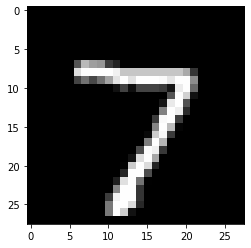

In [ ]:
plt.imshow(test_image.reshape(28, 28), 'gray')
plt.show()

 # 예측에 대한 정확도 확인

 한 장씩 예측해서 정확도 확인하기

In [ ]:
X, t = get_test_data()
net = init_network()
acc_count = 0 # 정답을 맞춘 개수를 저장 (ex. 10000만 장 중에 500 맞았으면 500)

# X에서 사진을 하나씩 꺼내서 테스트
for i in range(len(X)):
    pred = predict(net, X[i]) # pre의 shape : (10, )
    pred = np.argmax(pred) # 확률이 가장 높은 원소의 인덱스

    # 예측한 것과 정답이 같으면 count를 1개씩 up
    # if pred == t[i]:
    #     acc_count += 1
    acc_count += (pred==t[i])

print(float(acc_count / len(X)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9207


score는 92 점  
92%의 확률로 예측함

한 장씩 꺼내서 예측하는 것이 아닌 **batch**를 활용하여 묶음으로 예측해보기!

배치 : 데이터의 묶음  
**batch_size : 1 배치당 들어있어야 하는 데이터의 개수**  
ex ) 60,000개의 데이터를 batch_size 100으로 묶으면 600개의 배치가 만들어짐  
( 배치에서는 꼭 모든 데이터를 다 사용해야 함 )

In [ ]:
# 배치를 이용한 예측
X, t = get_test_data()
net = init_network()

batch_size = 100
acc_count = 0

for i in range(0, len(X), batch_size):  # i가 0, 100, 200 ... 으로 올라감
    X_batch = X[i : i + batch_size] # X_batch의 shape : (100, 784)

    pred_batch = predict(net, X_batch) # pred_batch의 shape : (100, 10)
    pred_batch = np.argmax(pred_batch, axis=1)

    acc_count += np.sum(pred_batch == t[i : i + batch_size])

print(float(acc_count) / len(X))

0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


X_batch와 pred_batch의 shape 값은 다음과 같은 원리로 추론 가능

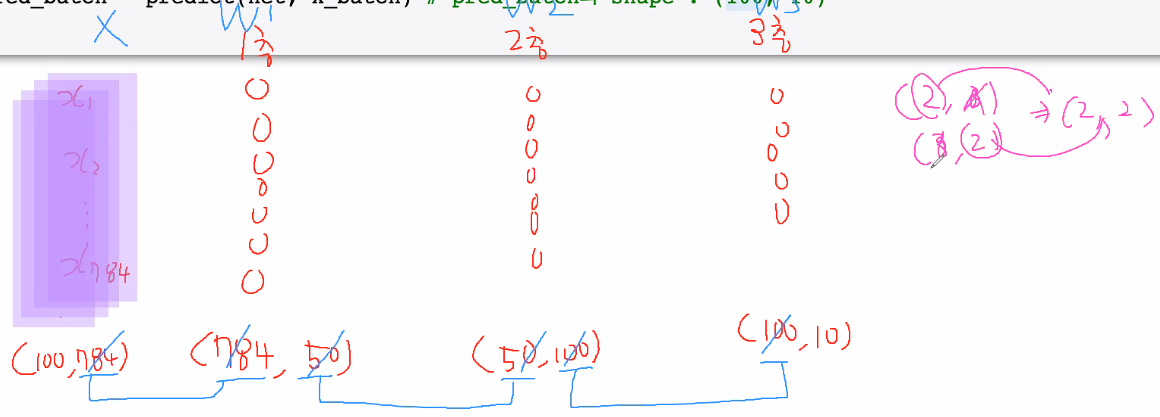